No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


               city  count
0             Aalst      2
1            Aalter      1
2          Aarschot      2
3           Aarsele      1
4    Aiseau-Presles      1
..              ...    ...
449          Zingem      1
450        Zonhoven      1
451        Zottegem      1
452           Zwalm      1
453     Zwijndrecht      1

[454 rows x 2 columns]


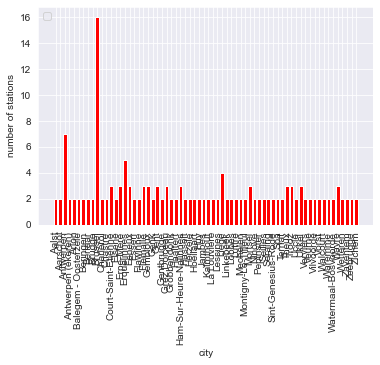

In [2]:
import pandas as pd
from pathlib import Path
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import src.utils as utils
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
import src.data_processing.data as data

In [3]:
data.facilities

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_open_wednesday,sales_close_wednesday,sales_open_thursday,sales_close_thursday,sales_open_friday,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday
2,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00
3,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
4,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,0 days 07:00:00,0 days 14:15:00,0 days 07:00:00,0 days 14:15:00,0 days 07:00:00,0 days 14:15:00,0 days 07:45:00,0 days 15:00:00,0 days 07:45:00,0 days 15:00:00
5,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 07:00:00,0 days 14:15:00
6,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,008832250,zolder,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
669,008832334,zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
670,008895208,zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 05:45:00,0 days 20:00:00,0 days 07:15:00,0 days 14:30:00,0 days 07:15:00,0 days 14:30:00
672,008894821,zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00


In [29]:
number_facilities = pd.DataFrame(data.facilities[data.facil_col].sum(axis = 0), index = data.facil_col, columns = ["Number of Facilities"])
number_facilities['Facility X'] = number_facilities.index
number_facilities['Test'] = ['abc', 'def', 'ded', 'abc', 'def', 'ded', 'abc', 'def', 'ded', 'abc', 'def', 'ded', 'abc', 'def', 'ded', 'bla', 'bla']

In [30]:
number_facilities = number_facilities.sort_values(by = "Number of Facilities", ascending=False)

In [32]:
number_facilities['Test']

ticket_vending_machine    abc
free_parking              ded
bus                       abc
disabled_parking_spots    ded
bicycle_spots             def
elevated_platform         abc
audio_induction_loop      bla
ramp                      def
blue-bike                 ded
taxi                      abc
escalator_up              def
wheelchair_available      abc
tram                      def
elevator_platform         bla
luggage_lockers           def
metro                     ded
escalator_down            ded
Name: Test, dtype: object

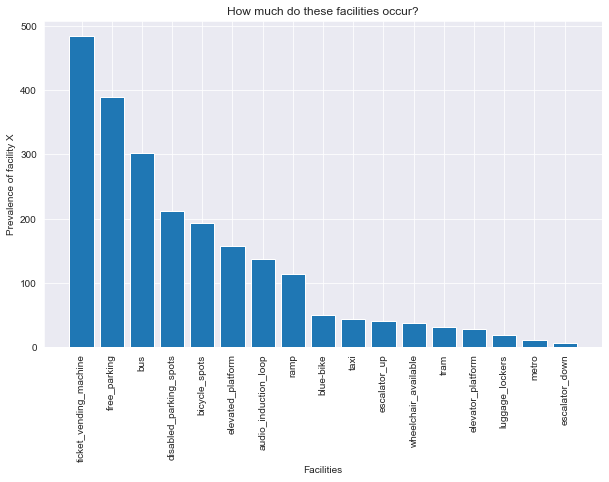

In [7]:
plt.figure(figsize=(10,6), facecolor= "white")
plt.bar(number_facilities['Facility X'], number_facilities['Number of Facilities'])
plt.xlabel("Facilities")
plt.ylabel("Prevalence of facility X")
plt.title("How much do these facilities occur?")
plt.xticks(rotation = "vertical")
plt.show()

In [57]:
rare_facilities = number_facilities.tail(9)
rare_facilities

,Number of Facilities,Facility X,Test
blue-bike,49.0,blue-bike,ded
taxi,44.0,taxi,abc
escalator_up,41.0,escalator_up,def
wheelchair_available,37.0,wheelchair_available,abc
tram,31.0,tram,def
elevator_platform,28.0,elevator_platform,bla
luggage_lockers,18.0,luggage_lockers,def
metro,11.0,metro,ded
escalator_down,6.0,escalator_down,ded


In [58]:
rare_facilities['Facility X']

blue-bike                          blue-bike
taxi                                    taxi
escalator_up                    escalator_up
wheelchair_available    wheelchair_available
tram                                    tram
elevator_platform          elevator_platform
luggage_lockers              luggage_lockers
metro                                  metro
escalator_down                escalator_down
Name: Facility X, dtype: object

In [63]:
stations_rare_facilities = []
for a in rare_facilities['Facility X']:
        stations_rare_facilities.append(data.facilities[data.facilities[a] == 1]['URI'])

len(stations_rare_facilities)

9

In [64]:
stations_rare_facilities

[2      008895000
 4      008891140
 5      008833209
 25     008821006
 38     008812070
 64     008891124
 109    008891009
 111    008813003
 114    008811304
 115    008812005
 118    008814001
 160    008892106
 164    008893401
 168    008831401
 186    008893708
 241    008832433
 244    008831765
 246    008893120
 247    008892007
 250    008895505
 269    008814308
 280    008831005
 287    008821832
 293    008821717
 317    008896503
 342    008896008
 367    008833001
 374    008821600
 386    008841004
 390    008894201
 392    008822111
 426    008822004
 427    008822343
 445    008832409
 448    008881000
 456    008821238
 466    008863008
 481    008895760
 490    008891702
 493    008811601
 496    008892601
 531    008896800
 572    008894508
 573    008831807
 602    008831310
 603    008891314
 611    008821907
 626    008811189
 636    008896149
 Name: URI, dtype: object,
 2      008895000
 17     008863404
 24     008821121
 25     008821006
 36     008866001
 